### Bibliotecas

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
import scipy.stats as stats
from scipy.stats import zscore
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import pingouin as pg
import plotly.express as px 
import plotly.io as pio
pio.renderers.default='browser'
import openpyxl
import matplotlib.pyplot as plt
from math import pi


### Funções

In [2]:
# Muda os nomes das colunas
def column_names(df):
    df.columns = df.columns.str.replace('%', '_PCT', regex=False)
    df.columns = df.columns.str.replace('/', '_', regex=False)
    return df


In [3]:
# Criar dummy na coluna W_L
# Substituir 'W' por 1 e 'L' por 0
def dummy_win_lose(df):
    df['W_L'] = df['W_L'].map({'W': 1, 'L': 0})
    return df


In [4]:
# Determinar se o jogo é em casa ou fora
def add_home_away_column(df):
    df['HOME_AWAY'] = df['MATCH'].apply(lambda x: 'home' if 'vs.' in x else 'away' if '@' in x else None)
    return df

In [5]:
# Inverte as linhas do dataset
def invert_rows(df):
    return df.iloc[::-1].reset_index(drop=True)


### Dataset

In [88]:
lakers_99_00 = pd.read_excel('dataset_teams/regular_season/lakers_1999_2000.xlsx')
lakers_00_01 = pd.read_excel('dataset_teams/regular_season/lakers_2000_2001.xlsx')
lakers_01_02 = pd.read_excel('dataset_teams/regular_season/lakers_2001_2002.xlsx')
lakers_03_04 = pd.read_excel('dataset_teams/regular_season/lakers_2003_2004.xlsx')
lakers_07_08 = pd.read_excel('dataset_teams/regular_season/lakers_2007_2008.xlsx')
lakers_08_09 = pd.read_excel('dataset_teams/regular_season/lakers_2008_2009.xlsx')
lakers_09_10 = pd.read_excel('dataset_teams/regular_season/lakers_2009_2010.xlsx')

warriors_14_15 = pd.read_excel('dataset_teams/regular_season/warriors_2014_2015.xlsx')
warriors_15_16 = pd.read_excel('dataset_teams/regular_season/warriors_2015_2016.xlsx')
warriors_16_17 = pd.read_excel('dataset_teams/regular_season/warriors_2016_2017.xlsx')
warriors_17_18 = pd.read_excel('dataset_teams/regular_season/warriors_2017_2018.xlsx')
warriors_18_19 = pd.read_excel('dataset_teams/regular_season/warriors_2018_2019.xlsx')
warriors_21_22 = pd.read_excel('dataset_teams/regular_season/warriors_2021_2022.xlsx')

In [89]:
lakers_99_00 = invert_rows(lakers_99_00)
lakers_00_01 = invert_rows(lakers_00_01)
lakers_01_02 = invert_rows(lakers_01_02)
lakers_07_08 = invert_rows(lakers_07_08)
lakers_03_04 = invert_rows(lakers_03_04)
lakers_08_09 = invert_rows(lakers_08_09)
lakers_09_10 = invert_rows(lakers_09_10)

warriors_14_15 = invert_rows(warriors_14_15)
warriors_15_16 = invert_rows(warriors_15_16)
warriors_16_17 = invert_rows(warriors_16_17)
warriors_17_18 = invert_rows(warriors_17_18)
warriors_18_19 = invert_rows(warriors_18_19)
warriors_21_22 = invert_rows(warriors_21_22)

In [90]:
# Concatenar os datasets
lakers_merged = pd.concat([
    lakers_99_00,
    lakers_00_01,
    lakers_01_02,
    lakers_03_04,
    lakers_07_08,
    lakers_08_09,
    lakers_09_10
], ignore_index=True)

warriors_merged = pd.concat([
    warriors_14_15,
    warriors_15_16,
    warriors_16_17,
    warriors_17_18,
    warriors_18_19,
    warriors_21_22
], ignore_index=True)

lakers_warriors_merged = pd.concat([
    lakers_merged,
    warriors_merged], ignore_index=True)

In [91]:
lakers_warriors_merged = column_names(lakers_warriors_merged)

In [92]:
lakers_warriors_merged = dummy_win_lose(lakers_warriors_merged)

In [93]:
lakers_warriors_merged = add_home_away_column(lakers_warriors_merged)

In [94]:
print(lakers_merged.shape)
print(warriors_merged.shape)
print(lakers_warriors_merged.shape)

(574, 23)
(492, 23)
(1066, 24)


In [95]:
lakers_warriors_merged.columns

Index(['MATCH', 'DATE', 'W_L', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT', '3PM',
       '3PA', '3P_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS', 'HOME_AWAY'],
      dtype='object')

In [96]:
lakers_warriors_merged.head()

,MATCH,DATE,W_L,MIN,PTS,FGM,FGA,FG_PCT,3PM,3PA,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,HOME_AWAY
0,LAL @ UTA,1999-11-02,1,240,91,33,76,43.4,8,13,...,16,29,45,22,9,6,16,27,7,away
1,LAL vs. VAN,1999-11-03,1,240,103,46,91,50.5,1,8,...,15,32,47,31,11,5,13,26,15,home
2,LAL @ POR,1999-11-06,0,240,82,31,78,39.7,3,12,...,15,24,39,16,8,3,14,24,-15,away
3,LAL vs. DAL,1999-11-07,1,240,105,40,86,46.5,5,19,...,15,36,51,24,7,2,11,29,8,home
4,LAL @ DAL,1999-11-09,1,240,123,53,85,62.4,5,12,...,14,39,53,21,8,6,21,24,22,away


In [97]:
lakers_warriors_merged.tail()

,MATCH,DATE,W_L,MIN,PTS,FGM,FGA,FG_PCT,3PM,3PA,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,HOME_AWAY
1061,GSW vs. UTA,2022-04-02,1,240,111,40,84,47.6,20,48,...,6,35,41,30,5,6,11,22,4,home
1062,GSW @ SAC,2022-04-03,1,240,109,41,79,51.9,16,34,...,7,40,47,29,8,8,17,28,19,away
1063,GSW vs. LAL,2022-04-07,1,240,128,51,97,52.6,16,32,...,9,36,45,39,10,5,15,26,16,home
1064,GSW @ SAS,2022-04-09,1,240,100,33,81,40.7,8,32,...,13,38,51,23,8,1,12,22,6,away
1065,GSW @ NOP,2022-04-10,1,240,128,49,81,60.5,19,33,...,7,34,41,33,5,2,17,15,21,away


### Clusterização

In [98]:
# Selecionado variáveis métricas
lakers_warriors_merged = lakers_warriors_merged.drop(columns=['MATCH', 'DATE', 'W_L', 'MIN','HOME_AWAY'])

In [99]:
# Aplicando o procedimento de ZScore
lakers_warriors_pad = lakers_warriors_merged.apply(zscore, ddof=1)

In [100]:
# Visualizando o resultado do procedimento na média e desvio padrão
print(round(lakers_warriors_pad.mean(), 2))
print(round(lakers_warriors_pad.std(), 2))

PTS           0.0
FGM           0.0
FGA           0.0
FG_PCT        0.0
3PM           0.0
3PA          -0.0
3P_PCT        0.0
FTM           0.0
FTA           0.0
FT_PCT        0.0
OREB          0.0
DREB         -0.0
REB          -0.0
AST           0.0
STL           0.0
BLK           0.0
TOV           0.0
PF            0.0
PLUS_MINUS    0.0
dtype: float64
PTS           1.0
FGM           1.0
FGA           1.0
FG_PCT        1.0
3PM           1.0
3PA           1.0
3P_PCT        1.0
FTM           1.0
FTA           1.0
FT_PCT        1.0
OREB          1.0
DREB          1.0
REB           1.0
AST           1.0
STL           1.0
BLK           1.0
TOV           1.0
PF            1.0
PLUS_MINUS    1.0
dtype: float64


#### Distância euclidiana e método de encadeamento Single Linkage

In [101]:
# Visualizando as distâncias
dist_euclidiana = pdist(lakers_warriors_pad, metric='euclidean')

dist_euclidiana

array([6.41364498, 4.84456547, 5.08752424, ..., 7.97237264, 4.76825943,
       8.10518957])

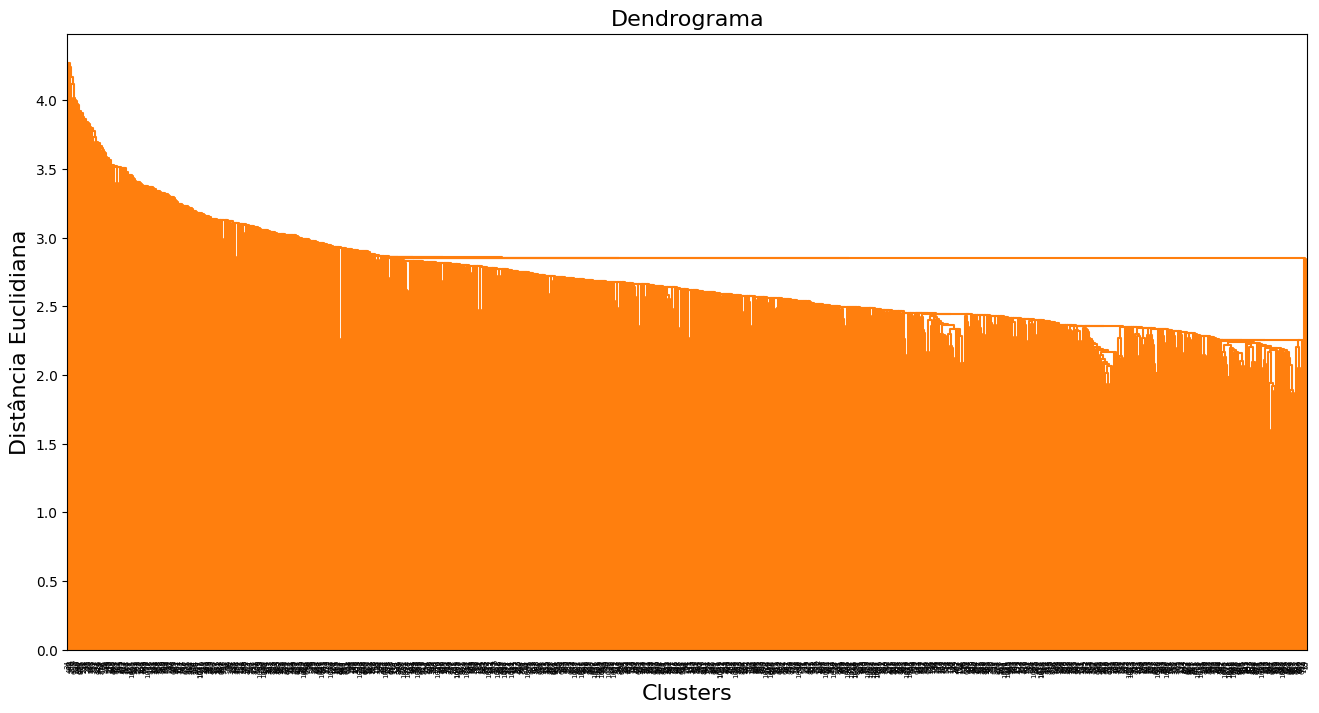

In [103]:
# Gerando o dendrograma

plt.figure(figsize=(16,8))
dend_sing = sch.linkage(lakers_warriors_pad, method = 'single', metric = 'euclidean')
dendrogram_s = sch.dendrogram(dend_sing, color_threshold = 4.5)
plt.title('Dendrograma', fontsize=16)
plt.xlabel('Clusters', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.axhline(y = 4.5, color = 'red', linestyle = '--')
plt.show()

In [69]:
# Gerando a variável com a indicação do cluster no dataset
# Fiz selecionando 13 clusters, pois o dataset tem o equivalente a 13 temporadas | não ficou legal
# A medida de distância e o método de encadeamento são mantidos

# cluster_sing = AgglomerativeClustering(n_clusters = 13, metric = 'euclidean', linkage = 'single')
# indica_cluster_sing = cluster_sing.fit_predict(lakers_warriors_pad)
# lakers_warriors_pad['cluster_single'] = indica_cluster_sing
# lakers_warriors_pad['cluster_single'] = lakers_warriors_pad['cluster_single'].astype('category')


In [104]:
# Gerando a variável com a indicação do cluster no dataset
# Selecionei 3 clusters
# A medida de distância e o método de encadeamento são mantidos

cluster_sing = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'single')
indica_cluster_sing = cluster_sing.fit_predict(lakers_warriors_pad)
lakers_warriors_pad['cluster_single'] = indica_cluster_sing
lakers_warriors_pad['cluster_single'] = lakers_warriors_pad['cluster_single'].astype('category')


O cluster "0" teve todas as observações praticamente.

No cluster 1 e 2 ficou apenas uma observação em cada, as observações com index 10 e 320

In [72]:
# Coeficientes do esquema hierárquico de aglomeração (single)
coef_single = [y[1] for y in dendrogram_s['dcoord']]
print(coef_single)

[np.float64(3.1192348522540767), np.float64(3.2153232338357607), np.float64(3.3967198081703764), np.float64(3.2169959714221545), np.float64(3.1295414726180586), np.float64(3.1597870505405967), np.float64(2.8810292793828225), np.float64(2.9904295215821795), np.float64(3.107310538683959), np.float64(2.649315671819523), np.float64(2.4716341782638658), np.float64(2.8570791350036226), np.float64(2.832801534612698), np.float64(3.035336449837121), np.float64(2.000382719588821), np.float64(2.764211079031294), np.float64(2.5251059723474176), np.float64(2.8890815822919187), np.float64(2.61171402756788), np.float64(2.9290368618414124), np.float64(2.463951092514334), np.float64(2.259243756830721), np.float64(2.380812913486299), np.float64(2.051956786230288), np.float64(2.895379704130108), np.float64(2.6012150505857035), np.float64(2.683242628695412), np.float64(2.6296207781639835), np.float64(2.7311142774465025), np.float64(2.834398942043039), np.float64(2.815285416998967), np.float64(2.4056187304

#### Distância euclidiana e método de encadeamento Complete Linkage

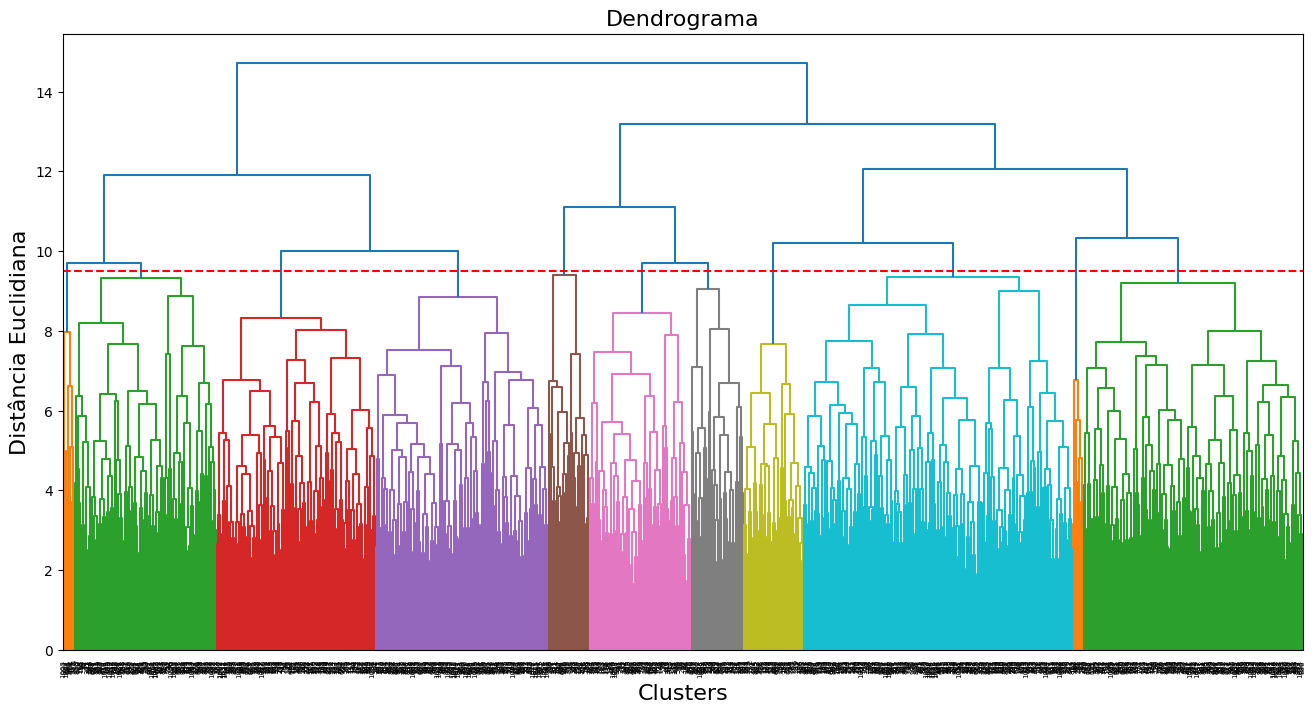

In [115]:
# Gerando o dendrograma

plt.figure(figsize=(16,8))
dend_compl = sch.linkage(lakers_warriors_pad, method = 'complete', metric = 'euclidean')
dendrogram_c = sch.dendrogram(dend_compl, color_threshold = 9.5)
plt.title('Dendrograma', fontsize=16)
plt.xlabel('Clusters', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.axhline(y = 9.5, color = 'red', linestyle = '--')
plt.show()

In [118]:
# Gerando a variável com a indicação do cluster no dataset
# Selecionei 9 clusters
# A medida de distância e o método de encadeamento são mantidos

cluster_comp = AgglomerativeClustering(n_clusters = 9, metric = 'euclidean', linkage = 'complete')
indica_cluster_comp = cluster_comp.fit_predict(lakers_warriors_pad)
lakers_warriors_pad['cluster_complete'] = indica_cluster_comp
lakers_warriors_pad['cluster_complete'] = lakers_warriors_pad['cluster_complete'].astype('category')

In [117]:
# Coeficientes do esquema hierárquico de aglomeração (single)
coef_single = [y[1] for y in dendrogram_s['dcoord']]
print(coef_single)

[np.float64(3.1192348522540767), np.float64(3.2153232338357607), np.float64(3.3967198081703764), np.float64(3.2169959714221545), np.float64(3.1295414726180586), np.float64(3.1597870505405967), np.float64(2.8810292793828225), np.float64(2.9904295215821795), np.float64(3.107310538683959), np.float64(2.649315671819523), np.float64(2.4716341782638658), np.float64(2.8570791350036226), np.float64(2.832801534612698), np.float64(3.035336449837121), np.float64(2.000382719588821), np.float64(2.764211079031294), np.float64(2.5251059723474176), np.float64(2.8890815822919187), np.float64(2.61171402756788), np.float64(2.9290368618414124), np.float64(2.463951092514334), np.float64(2.259243756830721), np.float64(2.380812913486299), np.float64(2.051956786230288), np.float64(2.895379704130108), np.float64(2.6012150505857035), np.float64(2.683242628695412), np.float64(2.6296207781639835), np.float64(2.7311142774465025), np.float64(2.834398942043039), np.float64(2.815285416998967), np.float64(2.4056187304

As observações ficaram melhor distribuídas que no método Single Linkage

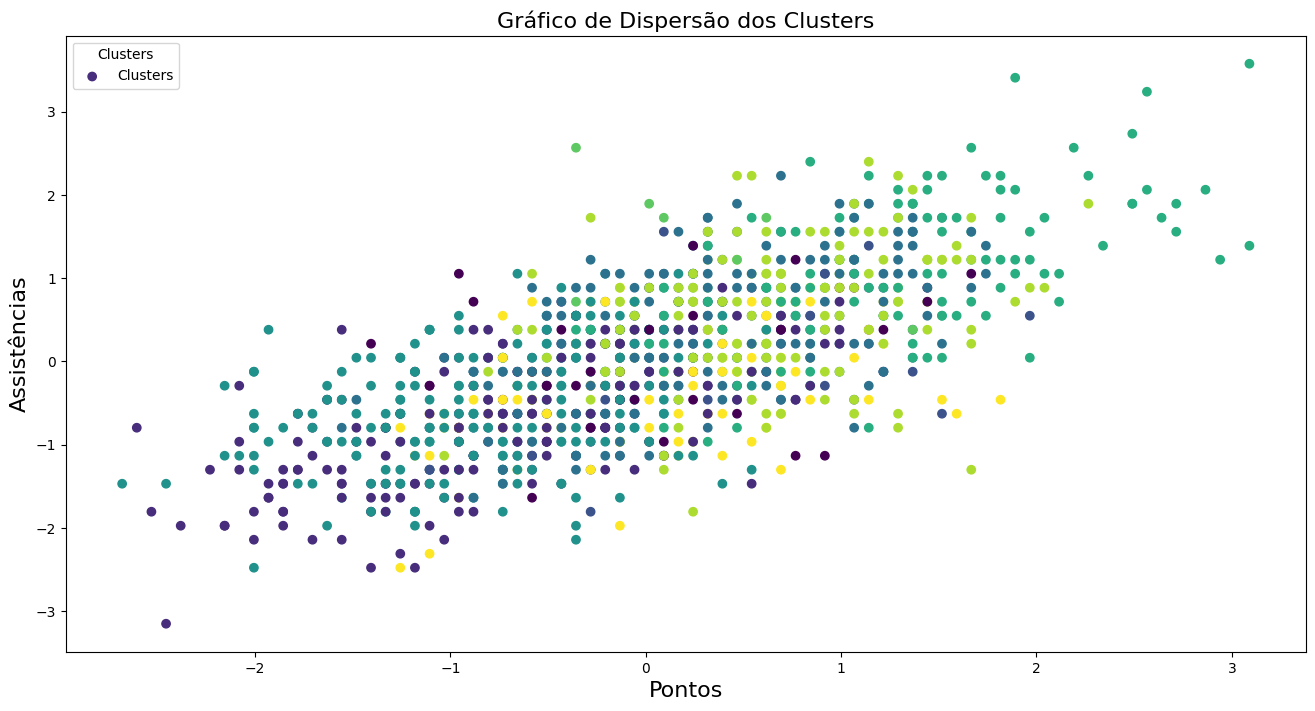

In [122]:
# Plotando o gráfico de dispersão
plt.figure(figsize=(16,8))

# Supondo que as duas primeiras colunas sejam características para o gráfico de dispersão
plt.scatter(lakers_warriors_pad.iloc[:, 0], lakers_warriors_pad.iloc[:, 13], 
            c=lakers_warriors_pad['cluster_complete'], cmap='viridis', label='Clusters')

plt.title('Gráfico de Dispersão dos Clusters', fontsize=16)
plt.xlabel('Pontos', fontsize=16)
plt.ylabel('Assistências', fontsize=16)
plt.legend(title='Clusters')
plt.show()

#### Distância euclidiana e método de encadeamento Average Linkage

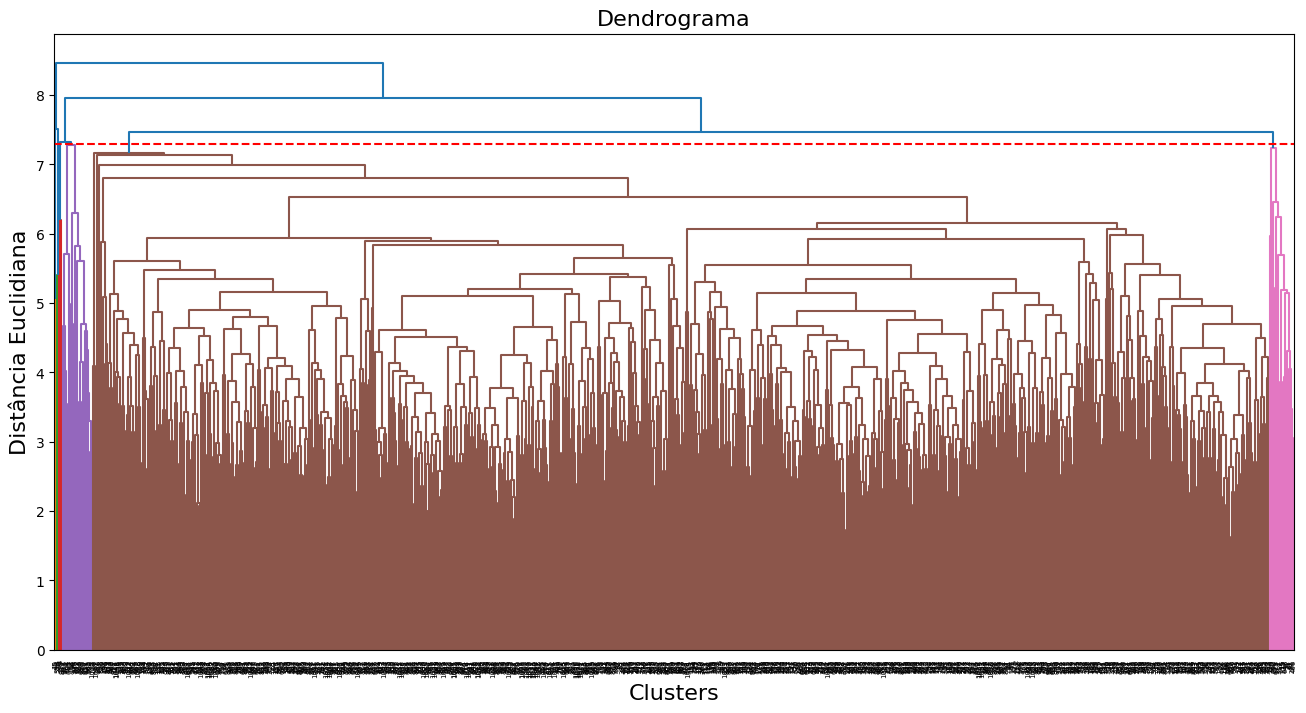

In [111]:
# Gerando o dendrograma

plt.figure(figsize=(16,8))
dend_avg = sch.linkage(lakers_warriors_pad, method = 'average', metric = 'euclidean')
dendrogram_a = sch.dendrogram(dend_avg, color_threshold = 7.3)
plt.title('Dendrograma', fontsize=16)
plt.xlabel('Clusters', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.axhline(y = 7.3, color = 'red', linestyle = '--')
plt.show()

In [112]:
# Gerando a variável com a indicação do cluster no dataset
# Selecionei 8 clusters como indicado no dendograma
# A medida de distância e o método de encadeamento são mantidos

cluster_avg = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'average')
indica_cluster_avg = cluster_avg.fit_predict(lakers_warriors_pad)
lakers_warriors_pad['cluster_average'] = indica_cluster_sing
lakers_warriors_pad['cluster_average'] = lakers_warriors_pad['cluster_average'].astype('category')

In [113]:
# Coeficientes do esquema hierárquico de aglomeração (single)
coef_single = [y[1] for y in dendrogram_s['dcoord']]
print(coef_single)

[np.float64(3.1192348522540767), np.float64(3.2153232338357607), np.float64(3.3967198081703764), np.float64(3.2169959714221545), np.float64(3.1295414726180586), np.float64(3.1597870505405967), np.float64(2.8810292793828225), np.float64(2.9904295215821795), np.float64(3.107310538683959), np.float64(2.649315671819523), np.float64(2.4716341782638658), np.float64(2.8570791350036226), np.float64(2.832801534612698), np.float64(3.035336449837121), np.float64(2.000382719588821), np.float64(2.764211079031294), np.float64(2.5251059723474176), np.float64(2.8890815822919187), np.float64(2.61171402756788), np.float64(2.9290368618414124), np.float64(2.463951092514334), np.float64(2.259243756830721), np.float64(2.380812913486299), np.float64(2.051956786230288), np.float64(2.895379704130108), np.float64(2.6012150505857035), np.float64(2.683242628695412), np.float64(2.6296207781639835), np.float64(2.7311142774465025), np.float64(2.834398942043039), np.float64(2.815285416998967), np.float64(2.4056187304

Desempenho idêntico ao método Single Linkage